## Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
df = pd.read_excel("premiums_with_life_style.xlsx")
df.head()

,Age,Gender,Region,Marital_status,Physical_Activity,Stress_Level,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,56,Female,Southeast,Unmarried,Medium,Medium,2,Normal,No Smoking,Self-Employed,25L - 40L,37,High blood pressure,Gold,27944
1,38,Female,Northeast,Married,Low,High,5,Overweight,Occasional,Freelancer,10L - 25L,10,No Disease,Silver,21108
2,18,Female,Southwest,Unmarried,Medium,High,0,Normal,No Smoking,Freelancer,<10L,9,No Disease,Bronze,8459
3,55,Male,Northeast,Married,High,Medium,3,Overweight,Occasional,Salaried,<10L,9,Thyroid,Silver,21685
4,22,Male,Southeast,Unmarried,Medium,High,2,Normal,Regular,Self-Employed,10L - 25L,13,High blood pressure & Heart disease,Bronze,15984


## Exploratory data analysis (EDA)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    10000 non-null  int64 
 1   Gender                 10000 non-null  object
 2   Region                 10000 non-null  object
 3   Marital_status         10000 non-null  object
 4   Physical_Activity      10000 non-null  object
 5   Stress_Level           10000 non-null  object
 6   Number Of Dependants   10000 non-null  int64 
 7   BMI_Category           10000 non-null  object
 8   Smoking_Status         9991 non-null   object
 9   Employment_Status      9993 non-null   object
 10  Income_Level           9982 non-null   object
 11  Income_Lakhs           10000 non-null  int64 
 12  Medical History        10000 non-null  object
 13  Insurance_Plan         10000 non-null  object
 14  Annual_Premium_Amount  10000 non-null  int64 
dtypes: int64(4), object(

In [4]:
df.columns = df.columns.str.replace(" ","_").str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'number_of_dependants', 'bmi_category',
       'smoking_status', 'employment_status', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount'],
      dtype='object')

In [5]:
df.isnull().sum()

age                       0
gender                    0
region                    0
marital_status            0
physical_activity         0
stress_level              0
number_of_dependants      0
bmi_category              0
smoking_status            9
employment_status         7
income_level             18
income_lakhs              0
medical_history           0
insurance_plan            0
annual_premium_amount     0
dtype: int64

In [6]:
df = df.dropna()
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df = df.drop_duplicates()

In [9]:
numeric_columns = df.select_dtypes(include=['int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f'Numeric colummns -> \n{numeric_columns} \n{"-"*120}\nCategorical columns -> \n{categorical_columns}')

Numeric colummns -> 
Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object') 
------------------------------------------------------------------------------------------------------------------------
Categorical columns -> 
Index(['gender', 'region', 'marital_status', 'physical_activity',
       'stress_level', 'bmi_category', 'smoking_status', 'employment_status',
       'income_level', 'medical_history', 'insurance_plan'],
      dtype='object')


### 1) Numeric Columns

In [10]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,41.319362,3.195628,23.382232,19503.816705
std,58.044687,21.679565,32.334811,8898.079736
min,18.000000,0.000000,1.000000,3582.000000
25%,24.000000,0.000000,6.000000,11774.000000
50%,37.000000,2.000000,16.000000,19314.000000
75%,50.000000,3.000000,31.000000,26500.000000
max,1178.000000,456.000000,960.000000,45854.000000


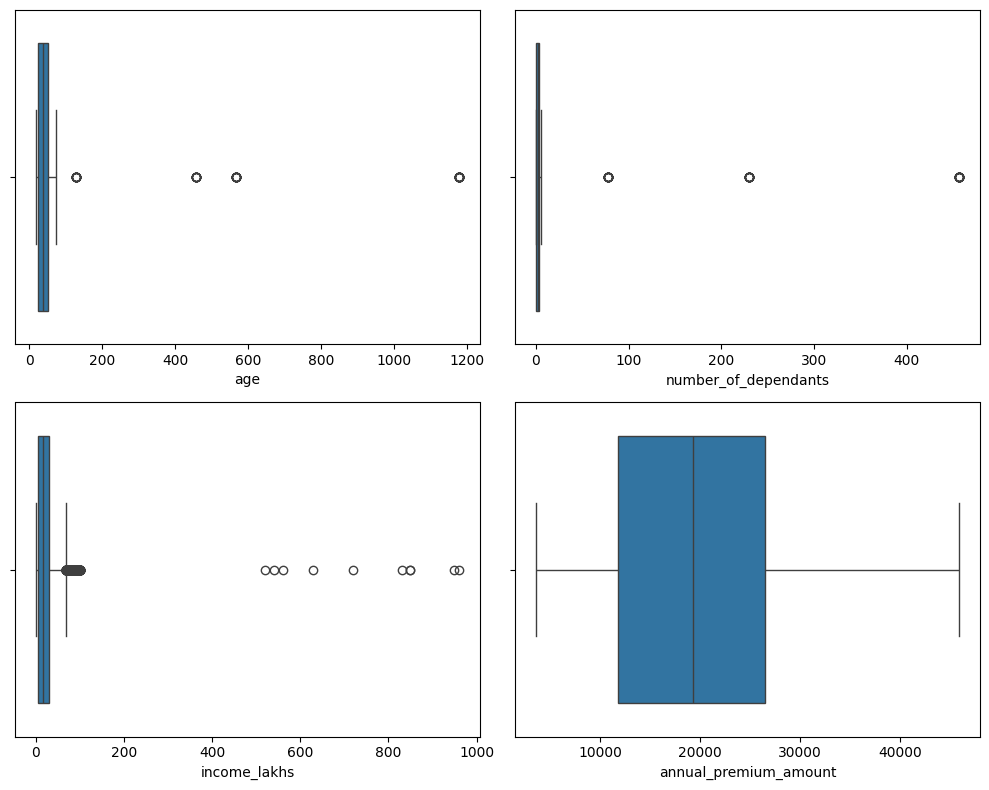

In [11]:
plt.figure(figsize=(10,8))
for i,feature in enumerate(numeric_columns,1):
    plt.subplot(2,2,i)
    sns.boxplot(df,x=feature)
plt.tight_layout()
plt.show()

In [12]:
df[df['age'] > 100]['age'].value_counts()

age
1178    20
128     14
567     14
456     10
Name: count, dtype: int64

In [13]:
df = df[df['age'] < 100]

In [14]:
df['number_of_dependants'].quantile(0.995)

np.float64(5.0)

In [15]:
df = df[df['number_of_dependants'] < 6]

In [16]:
df['income_lakhs'].quantile(0.999) 

np.float64(155.86000000068452)

In [17]:
df = df[df['income_lakhs'] < 200] 

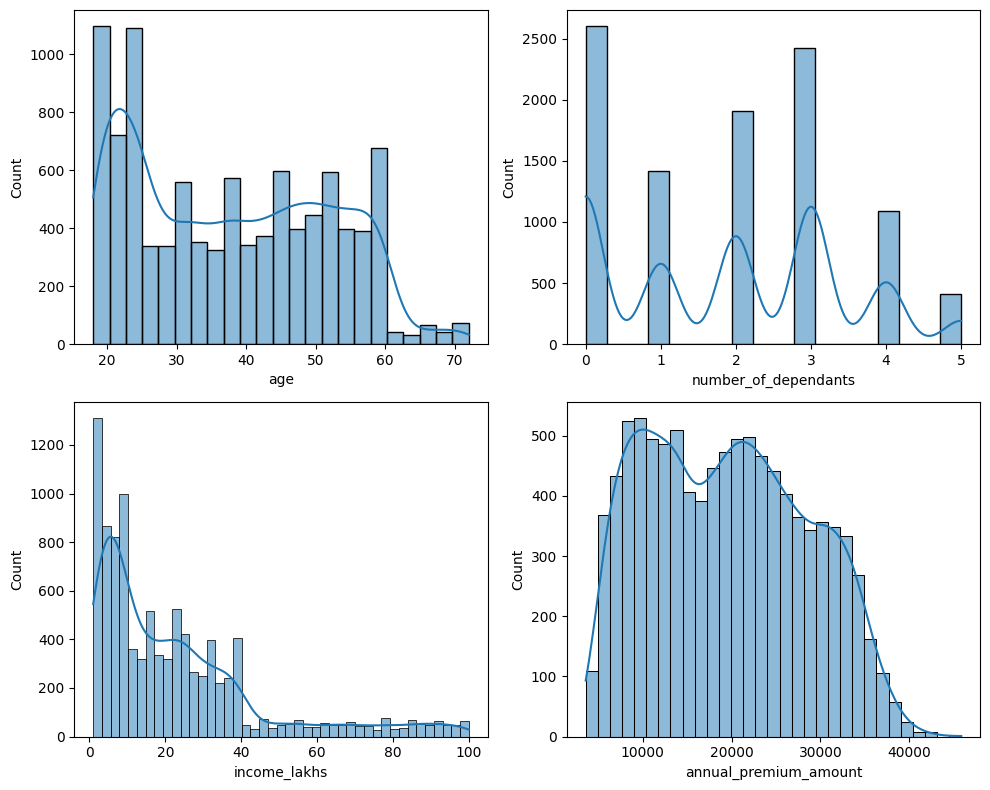

In [18]:
plt.figure(figsize=(10,8))
for i,feature in enumerate(numeric_columns,1):
    plt.subplot(2,2,i)
    sns.histplot(df,x=feature, kde=True)
plt.tight_layout()
plt.show()

### Categorical columns

In [19]:
for col in categorical_columns:
    print(df[col].unique())

['Female' 'Male']
['Southeast' 'Northeast' 'Southwest' 'Northwest']
['Unmarried' 'Married']
['Medium' 'Low' 'High']
['Medium' 'High' 'Low']
['Normal' 'Overweight' 'Obesity' 'Underweight']
['No Smoking' 'Occasional' 'Regular']
['Self-Employed' 'Freelancer' 'Salaried']
['25L - 40L' '10L - 25L' '<10L' '> 40L']
['High blood pressure' 'No Disease' 'Thyroid'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid' 'Diabetes'
 'Heart disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease']
['Gold' 'Silver' 'Bronze']


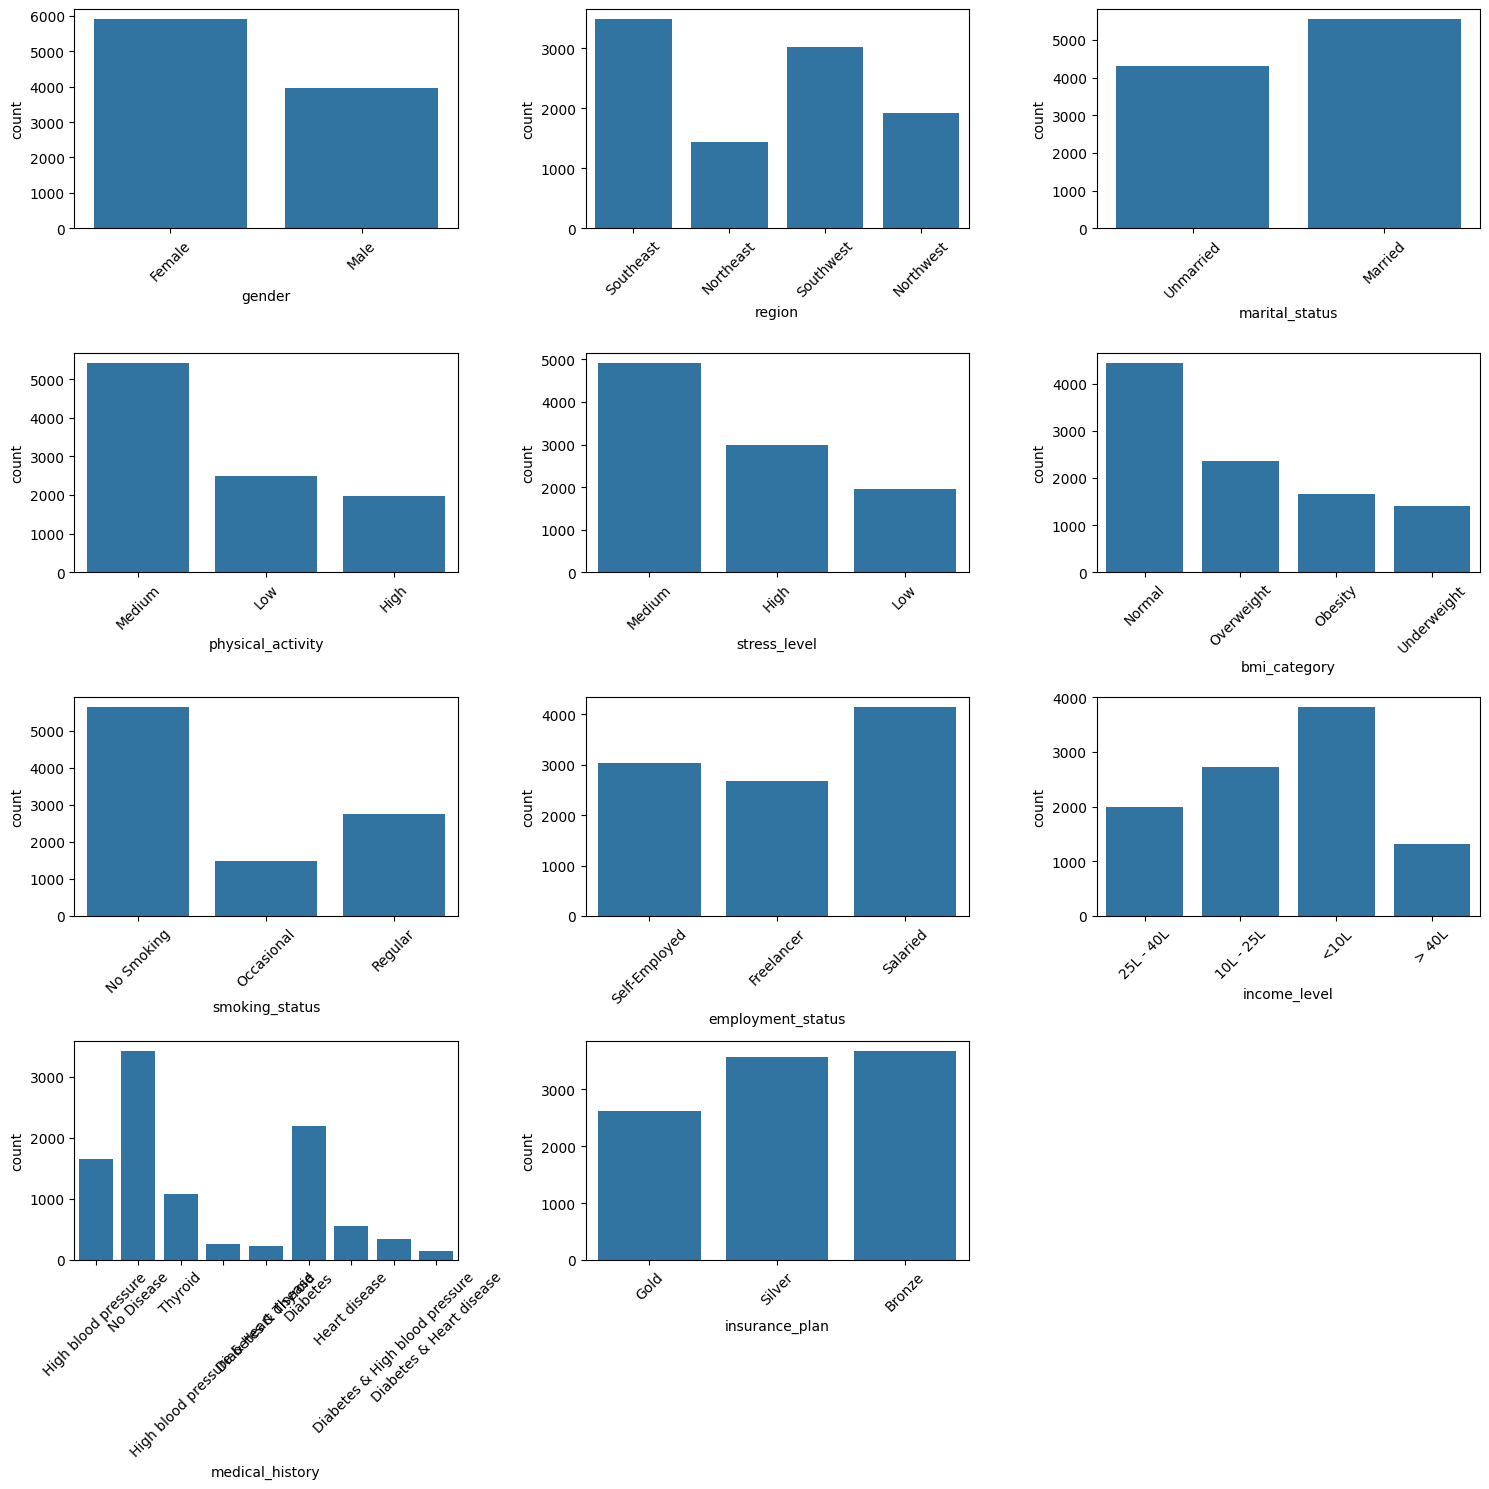

In [20]:
plt.figure(figsize=(15,15))
for i,feature in enumerate(categorical_columns,1):
    plt.subplot(4,3,i)
    sns.countplot(df,x=feature)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='age', ylabel='annual_premium_amount'>

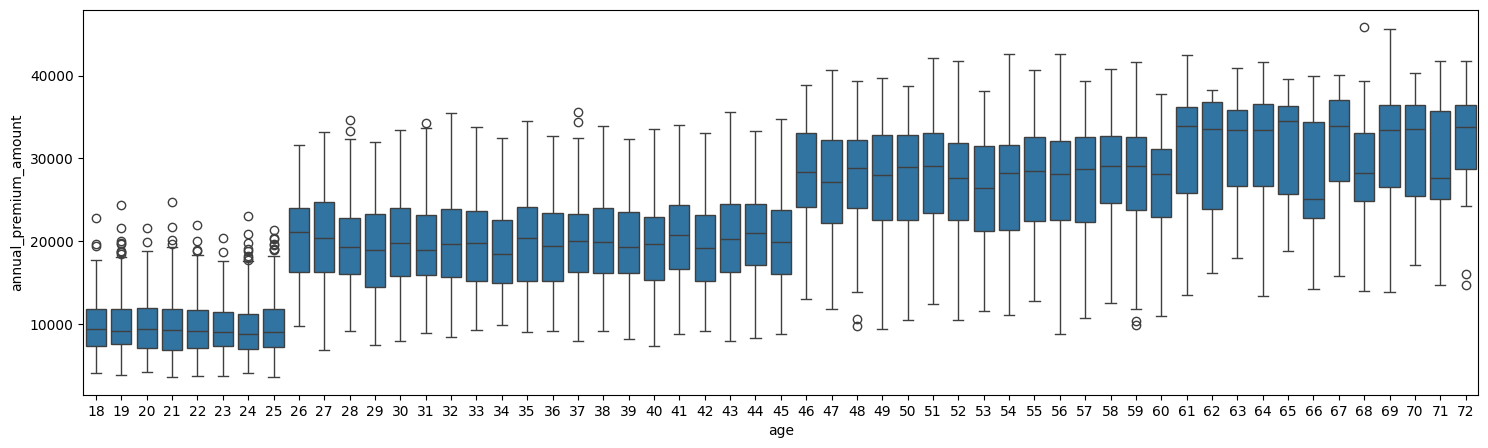

In [21]:
plt.figure(figsize=(18,5))
sns.boxplot(df,x='age', y='annual_premium_amount')

## Feature Engineering

In [22]:
df[['disease_1','disease_2']] = df['medical_history'].str.split(' & ', expand=True).apply(lambda x: x.str.lower())
df[['disease_1','disease_2']].sample(3)

,disease_1,disease_2
1193,no disease,None
8928,diabetes,thyroid
3862,diabetes,heart disease


In [23]:
df[['disease_1','disease_2']] = df[['disease_1','disease_2']].fillna('none')
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
physical_activity        0
stress_level             0
number_of_dependants     0
bmi_category             0
smoking_status           0
employment_status        0
income_level             0
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
disease_1                0
disease_2                0
dtype: int64

In [24]:
risk_scores = {
    "diabetes": 6,
    "heart disease": 8,
    "high blood pressure":6,
    "thyroid": 5,
    "no disease": 0,
    "none":0
}

df['disease_1_risk_score'] = df['disease_1'].map(risk_scores)
df['disease_2_risk_score'] = df['disease_2'].map(risk_scores)
df.sample(5)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease_1,disease_2,disease_1_risk_score,disease_2_risk_score
8325,32,Female,Northwest,Married,High,Medium,3,Normal,Occasional,Salaried,10L - 25L,24,Diabetes,Silver,18573,diabetes,none,6,0
1669,45,Female,Northwest,Married,Low,High,3,Overweight,Occasional,Freelancer,<10L,1,Diabetes,Bronze,17342,diabetes,none,6,0
9199,29,Female,Southeast,Unmarried,Medium,Medium,0,Underweight,Occasional,Self-Employed,<10L,3,High blood pressure,Bronze,12986,high blood pressure,none,6,0
7414,24,Male,Southeast,Unmarried,Medium,Low,1,Normal,No Smoking,Salaried,10L - 25L,23,No Disease,Bronze,4465,no disease,none,0,0
9455,60,Female,Southeast,Unmarried,Medium,Low,0,Normal,No Smoking,Freelancer,<10L,1,Thyroid,Silver,20529,thyroid,none,5,0


In [25]:
df['total_risk_score'] = df['disease_1_risk_score']+df['disease_2_risk_score']
df.sample(5)

,age,gender,region,marital_status,physical_activity,stress_level,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease_1,disease_2,disease_1_risk_score,disease_2_risk_score,total_risk_score
3659,55,Female,Southeast,Married,Medium,Medium,2,Normal,No Smoking,Salaried,<10L,2,Thyroid,Silver,19474,thyroid,none,5,0,5
7488,54,Female,Southwest,Married,Medium,Medium,4,Obesity,No Smoking,Salaried,> 40L,53,High blood pressure,Gold,32580,high blood pressure,none,6,0,6
8702,53,Female,Southeast,Married,Medium,Medium,3,Normal,No Smoking,Self-Employed,10L - 25L,10,Heart disease,Gold,32722,heart disease,none,8,0,8
248,19,Female,Northwest,Unmarried,Medium,Medium,0,Underweight,No Smoking,Self-Employed,> 40L,100,Diabetes & Thyroid,Silver,13597,diabetes,thyroid,6,5,11
1355,53,Female,Southwest,Married,Medium,Medium,2,Normal,Occasional,Freelancer,<10L,1,Thyroid,Bronze,13917,thyroid,none,5,0,5


### 1) Nominal features

In [26]:
nominal_features = ['gender', 'region', 'marital_status', 'bmi_category','smoking_status','employment_status']
df = pd.get_dummies(df,columns=nominal_features,drop_first=True, dtype=int)
df.sample(5)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease_1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
7391,60,Medium,Medium,0,<10L,1,High blood pressure,Silver,21257,high blood pressure,...,1,0,1,0,0,0,0,0,0,1
789,56,Low,Medium,5,10L - 25L,13,Diabetes,Gold,32760,diabetes,...,0,1,0,0,1,0,0,0,1,0
6483,38,High,High,1,10L - 25L,13,High blood pressure,Gold,26567,high blood pressure,...,0,0,1,0,0,1,1,0,1,0
3955,44,Low,High,3,<10L,5,Diabetes,Bronze,17902,diabetes,...,1,0,0,0,0,0,0,1,0,0
5716,23,Low,Low,0,25L - 40L,27,No Disease,Bronze,10023,no disease,...,1,0,1,0,1,0,0,0,1,0


### 2) Ordinal features

In [27]:
ordinal_features = ['physical_activity', 'stress_level','income_level', 'insurance_plan'  ]

for feature in ordinal_features:
    print(df[feature].unique())

['Medium' 'Low' 'High']
['Medium' 'High' 'Low']
['25L - 40L' '10L - 25L' '<10L' '> 40L']
['Gold' 'Silver' 'Bronze']


In [28]:

df['physical_activity'] = df['physical_activity'].map({'Low' : 0,'Medium' : 1,'High' : 2})

df['stress_level'] = df['stress_level'].map({'Low' : 2,'Medium' : 1,'High' : 0})

df['income_level'] = df['income_level'].map({ '<10L': 0, '10L - 25L':1, '25L - 40L':2, '> 40L':3})

df['insurance_plan'] = df['insurance_plan'].map({'Gold':2, 'Silver':1, 'Bronze':0})

df.sample(3)

,age,physical_activity,stress_level,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease_1,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
9020,20,1,1,2,3,59,No Disease,1,10122,no disease,...,1,0,1,0,0,0,0,0,1,0
7726,49,1,2,3,0,9,Diabetes & Heart disease,1,26503,diabetes,...,0,0,0,0,1,0,0,0,0,1
4833,23,1,0,0,2,32,No Disease,0,7845,no disease,...,1,0,1,0,0,1,0,0,1,0


### Drop redundant feature columns

In [29]:
df = df.drop(columns=['medical_history','disease_1','disease_2','disease_1_risk_score','disease_2_risk_score', 'income_lakhs' ])
df.head()

,age,physical_activity,stress_level,number_of_dependants,income_level,insurance_plan,annual_premium_amount,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,56,1,1,2,2,2,27944,6,0,0,1,0,1,0,0,0,0,0,0,1
1,38,0,0,5,1,1,21108,0,0,0,0,0,0,0,1,0,1,0,0,0
2,18,1,0,0,0,0,8459,0,0,0,0,1,1,0,0,0,0,0,0,0
3,55,2,1,3,0,1,21685,5,1,0,0,0,0,0,1,0,1,0,1,0
4,22,1,0,2,1,0,15984,14,1,0,1,0,1,0,0,0,0,1,0,1


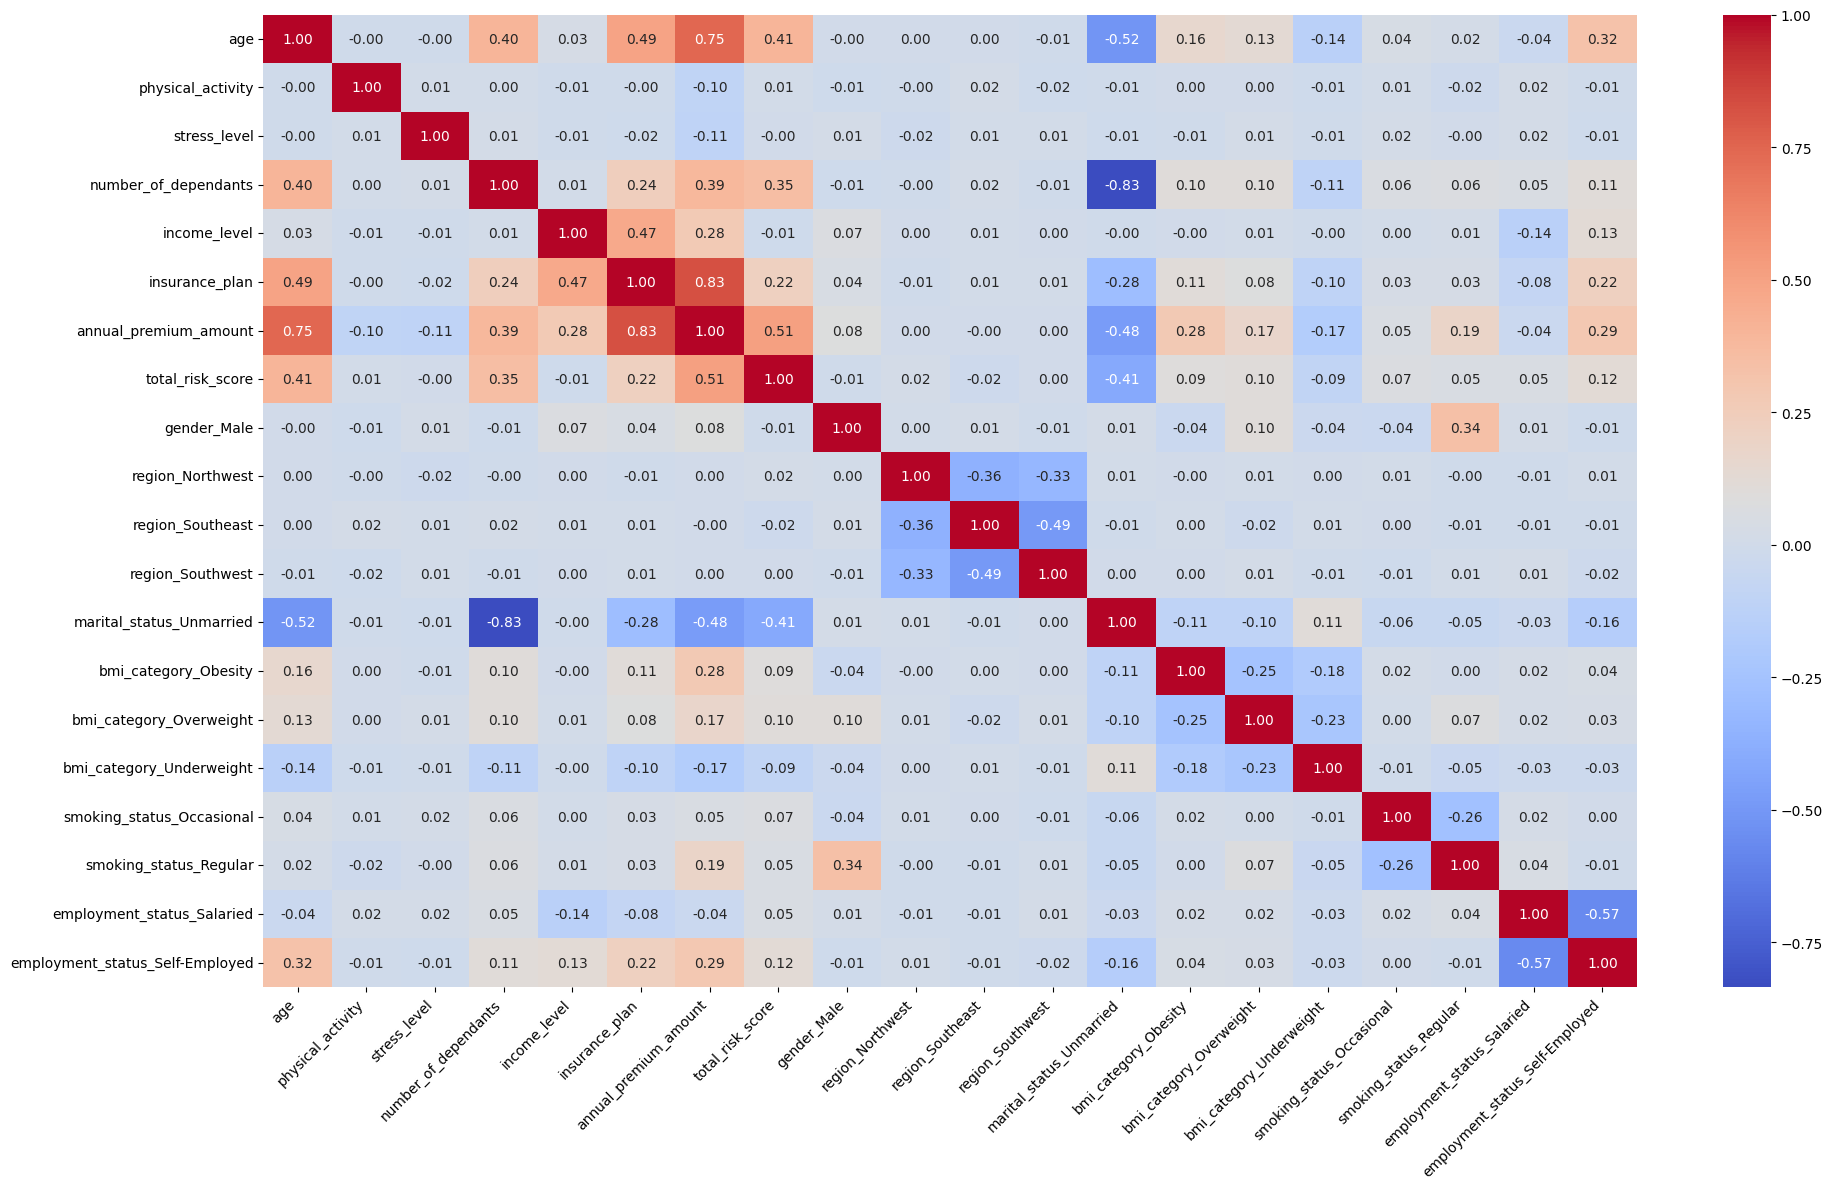

In [30]:
corr = df.corr()
plt.figure(figsize=(20,12))
sns.heatmap(corr, annot=True, fmt='0.2f', cmap='coolwarm')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [31]:
X = df.drop('annual_premium_amount', axis='columns')
y = df['annual_premium_amount']

In [32]:
X.describe()

,age,physical_activity,stress_level,number_of_dependants,income_level,insurance_plan,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000
mean,37.764760,0.946642,0.896531,1.919963,1.082268,0.892270,4.571516,0.401298,0.194664,0.353013,0.306452,0.437716,0.167985,0.240414,0.141712,0.150030,0.278657,0.420065,0.308176
std,13.976268,0.669631,0.700907,1.503027,1.056595,0.791529,3.907161,0.490186,0.395962,0.477931,0.461043,0.496131,0.373872,0.427356,0.348773,0.357119,0.448361,0.493594,0.461763
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,1.000000,1.000000,2.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,50.000000,1.000000,1.000000,3.000000,2.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,72.000000,2.000000,2.000000,5.000000,3.000000,2.000000,14.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
X_scaled = X.copy()
cols_to_scale = ['age','physical_activity','stress_level', 'number_of_dependants', 'income_level', 'insurance_plan','total_risk_score']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled[cols_to_scale] = scaler.fit_transform(X_scaled[cols_to_scale])
X_scaled.describe()

,age,physical_activity,stress_level,number_of_dependants,income_level,insurance_plan,total_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000,9858.000000
mean,0.366014,0.473321,0.448265,0.383993,0.360756,0.446135,0.326537,0.401298,0.194664,0.353013,0.306452,0.437716,0.167985,0.240414,0.141712,0.150030,0.278657,0.420065,0.308176
std,0.258820,0.334815,0.350454,0.300605,0.352198,0.395765,0.279083,0.490186,0.395962,0.477931,0.461043,0.496131,0.373872,0.427356,0.348773,0.357119,0.448361,0.493594,0.461763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.351852,0.500000,0.500000,0.400000,0.333333,0.500000,0.428571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.592593,0.500000,0.500000,0.600000,0.666667,1.000000,0.428571,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df["feature"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_df

In [35]:
calculate_vif(X_scaled)

,feature,VIF
0,age,5.546034
1,physical_activity,2.828919
2,stress_level,2.516754
3,number_of_dependants,5.481860
4,income_level,2.812641
5,insurance_plan,4.147698
6,total_risk_score,3.005749
7,gender_Male,1.908864
8,region_Northwest,2.083273
9,region_Southeast,2.978199


## Model Training

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso, Ridge


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape[0],X_test.shape[0], y_train.shape[0], y_test.shape[0])

6900 2958 6900 2958


In [38]:
linear_model = LinearRegression()
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()
scaler = MinMaxScaler()

### Linear Model

In [61]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

model = linear_model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('r2 score -> ',r2_score(y_test, y_pred))
print('mean squared error -> ',mean_squared_error(y_test,y_pred))
print('root mean squared error -> ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score ->  0.9557721894434342
mean squared error ->  3434978.4493507743
root mean squared error ->  1853.3694853835202


In [62]:
cross_val_score(model,X,y,cv=5,verbose=1)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


array([0.951869, 0.954965, 0.957122, 0.957504, 0.955984])

In [40]:
np.set_printoptions(precision=6)
model.coef_

array([10892.641923, -2421.188796, -2451.748649,  -656.87485 ,
        -280.171062, 13175.579747,  6508.63046 ,    89.340857,
          30.857365,   108.600536,   -22.918066,  -780.308145,
        4102.514111,  2052.060708,   346.930073,  1203.240304,
        3099.375291,    55.391555,   374.268234])

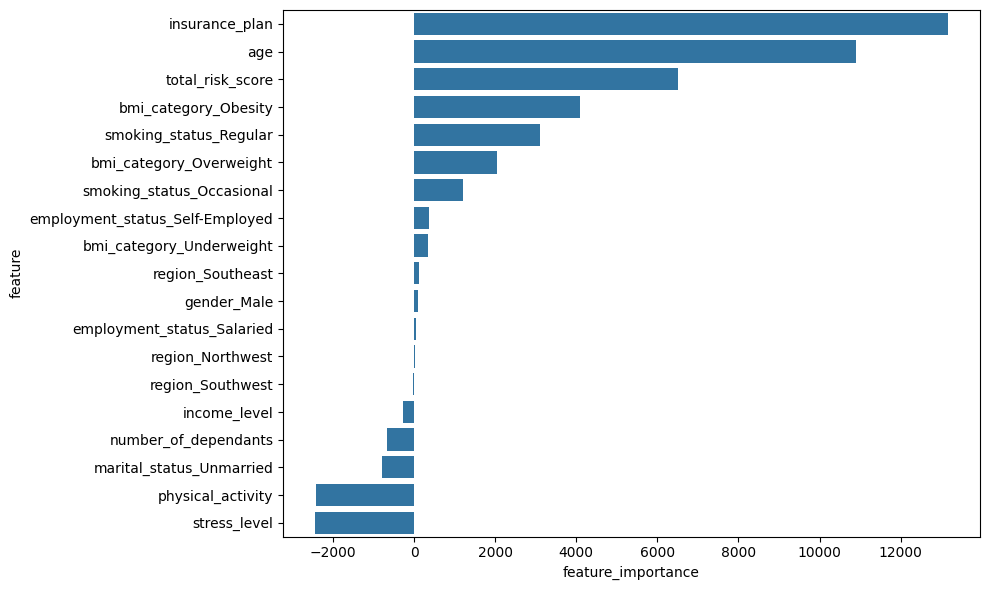

In [41]:
feature_importance = pd.DataFrame(
    model.coef_,
    index=X_train_scaled.columns,
    columns=['feature_importance']
)
# Sort values (optional)
feature_importance = feature_importance.sort_values(by='feature_importance', ascending=False)

# Reset index for seaborn
feature_importance = feature_importance.reset_index().rename(columns={'index': 'feature'})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, y='feature', x='feature_importance')
plt.tight_layout()
plt.show()

### Random forest Model

In [63]:
model = rf_model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('r2 score ->',r2_score(y_test, y_pred))
print('mean squared error -> ',mean_squared_error(y_test,y_pred))
print('root mean squared error -> ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score -> 0.9897459991005394
mean squared error ->  796382.9017541496
root mean squared error ->  892.4028808526728


In [64]:
cross_val_score(model,X,y,cv=5,verbose=1)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    9.6s finished


array([0.990581, 0.991096, 0.991249, 0.989914, 0.989879])

### XGBoost Model

In [65]:
model = xgb_model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('r2 score -> ',r2_score(y_test, y_pred))
print('mean squared error -> ',mean_squared_error(y_test,y_pred))
print('root mean squared error -> ',np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score ->  0.9940329194068909
mean squared error ->  463436.6875
root mean squared error ->  680.7618434518786


In [66]:
cross_val_score(model,X,y,cv=5,verbose=1)

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished


array([0.993993, 0.993999, 0.994559, 0.994334, 0.993761])

In [44]:
model_xgb = XGBRegressor()
param_grid = {
    'n_estimators': [20, 40, 50],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

random_search = RandomizedSearchCV(estimator=model_xgb, param_distributions=param_grid,n_iter=10, cv=2, scoring='r2', random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)
random_search.best_params_

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [45]:
random_search.best_score_

np.float64(0.9910773038864136)

In [46]:
best_model = random_search.best_estimator_
best_model.score(X_test, y_test)

0.992072582244873

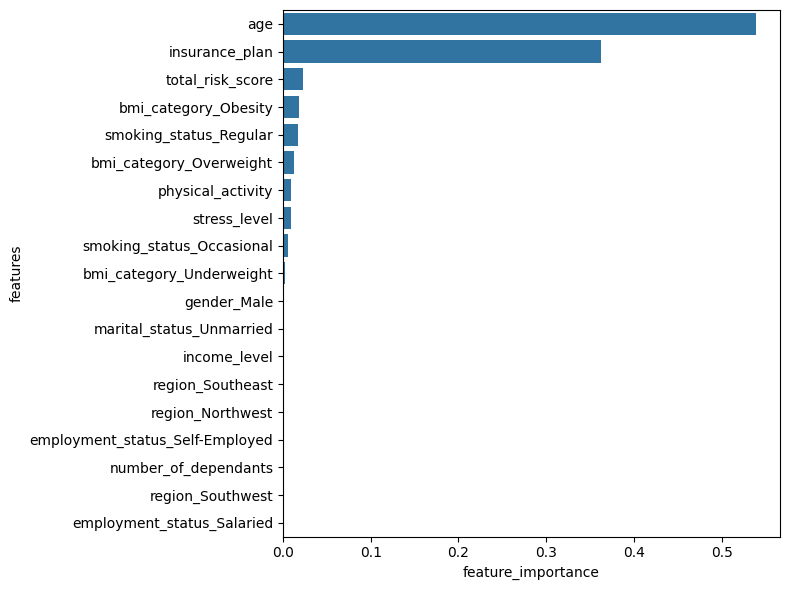

In [47]:
feature_importance = pd.DataFrame(best_model.feature_importances_, index=X_train.columns, columns=['feature_importance'])
feature_importance = feature_importance.reset_index().rename(columns={"index":"features"}).sort_values(by='feature_importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(feature_importance, x='feature_importance', y='features')
plt.tight_layout()
plt.show()

In [68]:
final_best_model = XGBRegressor()
final_best_model.fit(X_train, y_train)
final_best_model.score(X_test, y_test)

0.9940329194068909

In [69]:

y_pred = final_best_model.predict(X_test)

residuals = y_pred - y_test
residuals_pct = (residuals / y_test) * 100

results_df = pd.DataFrame({
    'actual': y_test, 
    'predicted': y_pred, 
    'diff': residuals, 
    'diff_pct': residuals_pct
})
results_df.head()

,actual,predicted,diff,diff_pct
8496,30733,30643.701172,-89.298828,-0.290563
507,32997,33067.015625,70.015625,0.212188
5147,15251,15392.276367,141.276367,0.926342
887,6936,7400.703613,464.703613,6.699879
8848,10909,11579.215820,670.215820,6.143696


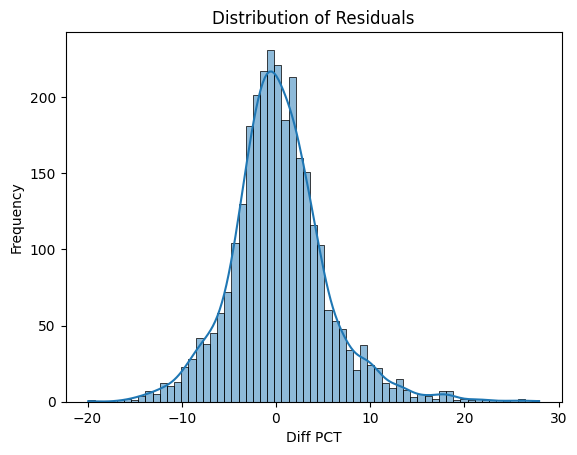

In [70]:
sns.histplot(results_df['diff_pct'], kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Diff PCT')
plt.ylabel('Frequency')
plt.show()

In [72]:
extreme_error_threshold = 10  
extreme_results_df = results_df[np.abs(results_df['diff_pct']) > extreme_error_threshold]
extreme_results_df.head()

,actual,predicted,diff,diff_pct
5084,10257,11445.967773,1188.967773,11.591769
1918,7431,8237.582031,806.582031,10.854287
7772,7225,6376.540039,-848.459961,-11.743390
8013,5318,5908.800293,590.800293,11.109445
6559,6565,7242.665527,677.665527,10.322400


In [73]:
extreme_errors_pct = extreme_results_df.shape[0]*100/X_test.shape[0]
extreme_errors_pct

6.118999323867478

In [75]:
from joblib import dump
dump(final_best_model,"model.joblib")


['model.joblib']